In [ ]:
# https://medium.com/@mehmetalitor/top-14-machine-learning-regression-algorithms-2cf128c8935e

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
import lightgbm as lgbm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
plt.style.use('ggplot')

In [ ]:
# Farms of 16 WECs
# 1. WECs position {X1, X2, ..., X16; Y1, Y2, ..., Y16} continuous from 0 to 566 (m).
# 2. WECs absorbed power: {P1, P2, ..., P16}
# 3. Total power output of the farm: Powerall

columns = [
    'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
    'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
    'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
    'power_output'
]

adelaide_df = pd.read_csv(f'https://drive.google.com/uc?id=15s1tbjkPsBEb-mN-A4nLd2V6slVc-BOk', header=None, names=columns)
perth_df    = pd.read_csv(f'https://drive.google.com/uc?id=157j7zBQyXfnHC9Jq7dcthrm3SE3cWtUd', header=None, names=columns)
sydney_df   = pd.read_csv(f'https://drive.google.com/uc?id=1OkhrNi2Du_pX9_qa24TTCH9MOviI8Sqs', header=None, names=columns)
tasmania_df = pd.read_csv(f'https://drive.google.com/uc?id=1FD2bAy-FVFRl5xirGRXR3bWFhgGlbFSj', header=None, names=columns)

adelaide_df['region'] = 'adelaide'
perth_df['region']    = 'pert'
sydney_df['region']   = 'sydney'
tasmania_df['region'] = 'tasmania'

df = pd.concat([adelaide_df, perth_df, sydney_df, tasmania_df], ignore_index=True)

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P9,P10,P11,P12,P13,P14,P15,P16,power_output,region
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145,adelaide
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765,adelaide
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511,adelaide
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375,adelaide
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577,adelaide


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287999 entries, 0 to 287998
Data columns (total 50 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X1            287999 non-null  float64
 1   X2            287999 non-null  float64
 2   X3            287999 non-null  float64
 3   X4            287999 non-null  float64
 4   X5            287999 non-null  float64
 5   X6            287999 non-null  float64
 6   X7            287999 non-null  float64
 7   X8            287999 non-null  float64
 8   X9            287999 non-null  float64
 9   X10           287999 non-null  float64
 10  X11           287999 non-null  float64
 11  X12           287999 non-null  float64
 12  X13           287999 non-null  float64
 13  X14           287999 non-null  float64
 14  X15           287999 non-null  float64
 15  X16           287999 non-null  float64
 16  Y1            287999 non-null  float64
 17  Y2            287999 non-null  float64
 18  Y3  

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,power_output
count,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,...,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,2.879990e+05
mean,303.361390,288.828986,285.471335,270.258093,308.392264,259.016305,267.693805,281.439988,278.678314,279.313500,...,125113.632361,125790.632003,126684.069921,126154.058542,125530.676521,125180.902744,125909.760488,126916.882460,126386.580611,2.012730e+06
std,190.112347,186.198477,191.487051,190.182035,183.753901,195.598351,188.489448,182.806890,186.468850,188.320188,...,64072.862185,65342.647701,67108.881129,65121.499953,65217.797447,64840.183043,65331.456660,66424.247765,65828.380143,1.011813e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46239.804500,50114.929100,47183.047800,49291.778000,49549.990600,49465.685600,47027.625800,48982.438200,46881.573700,1.177711e+06
25%,125.808200,118.254850,101.479600,91.722700,144.096850,70.332300,92.598150,116.857900,108.795050,105.047200,...,86266.700450,85886.688500,85733.047750,86258.180650,85500.872850,85320.260000,85825.298400,86389.606250,86418.719750,1.395535e+06
50%,325.988400,295.566300,295.350400,261.205500,324.787200,238.540200,250.900900,280.767900,275.015900,279.885100,...,96271.698300,96056.649500,95898.505000,96752.233000,96461.140400,95838.375400,96316.033700,96659.657700,96550.670500,1.472576e+06
75%,480.899700,459.107900,461.863200,444.303700,476.744050,445.595450,444.254400,448.578500,452.639600,452.866900,...,119901.332000,123990.808150,118068.984250,121409.180050,118751.623350,120500.284600,122038.168850,122149.899450,118639.845000,2.409092e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,282143.804400,279824.753000,283548.559400,281457.365400,281789.422200,281968.795200,286279.149600,282189.733800,283875.584200,4.241838e+06


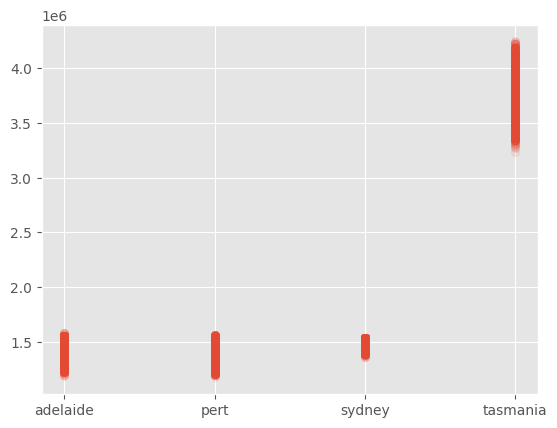

In [ ]:
plt.scatter(df.region, df.power_output, alpha=0.1)
plt.show()

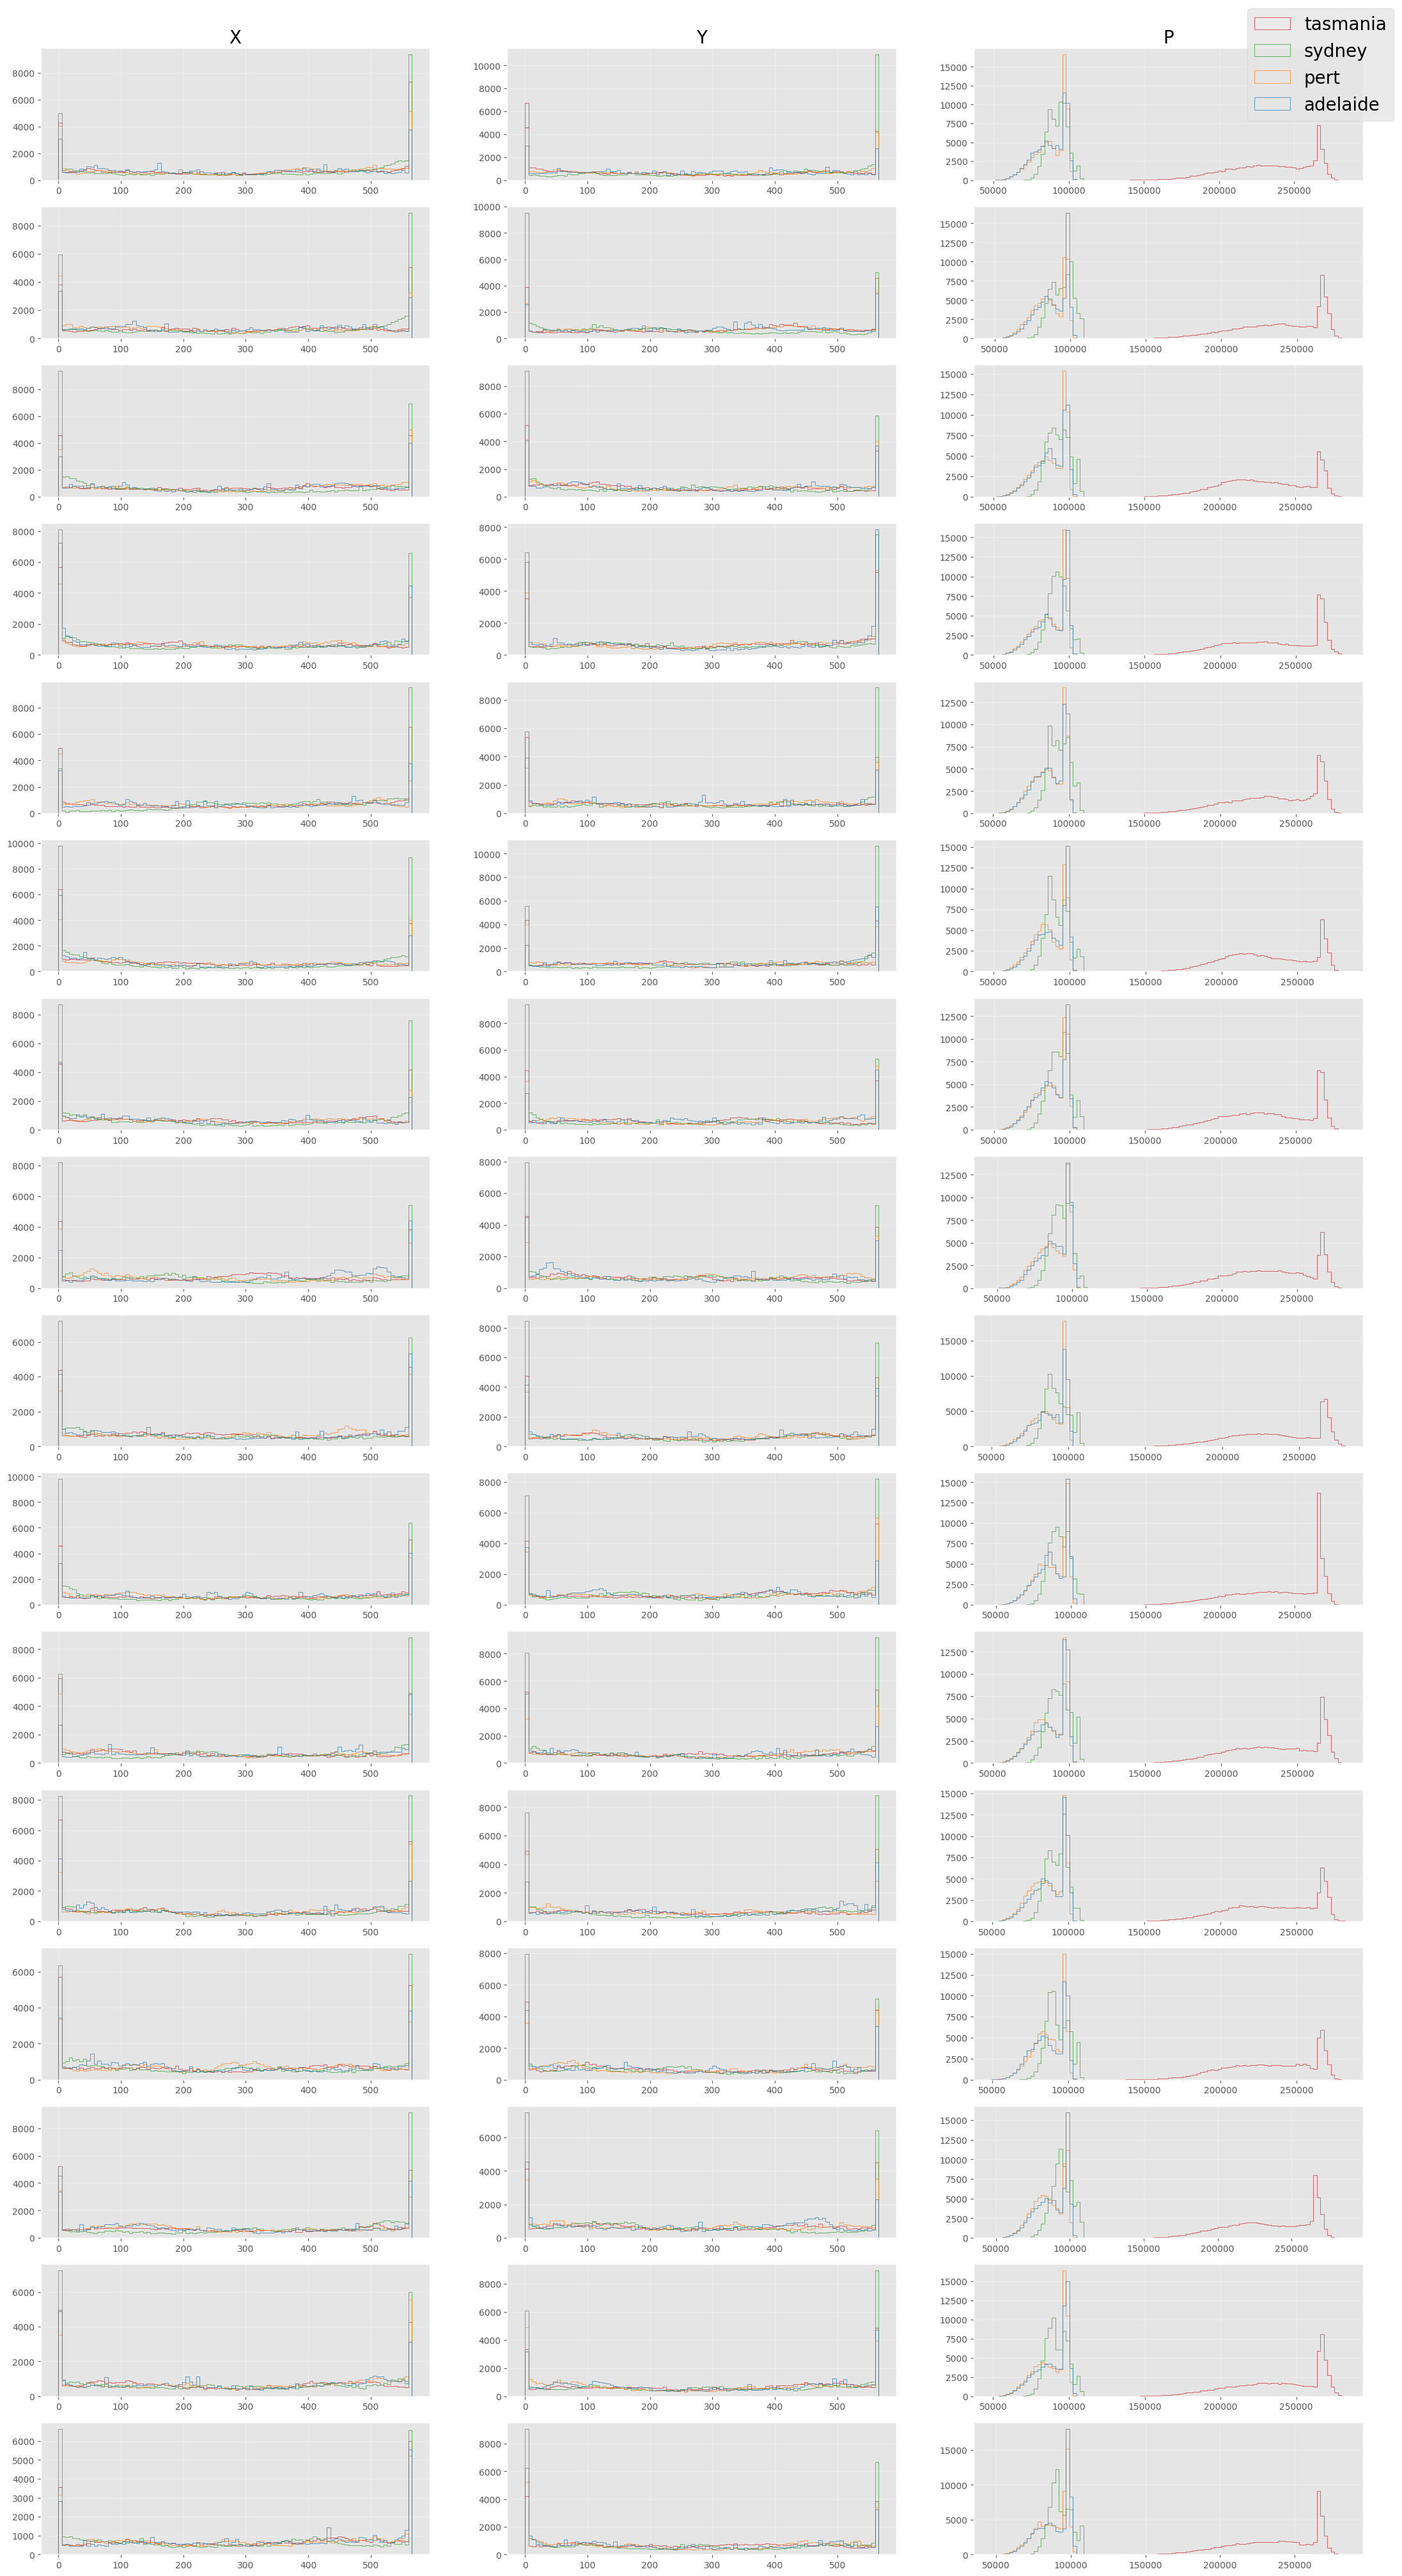

In [ ]:
fig = plt.figure(figsize=(22, 40))

for col, off in [('X', 1), ('Y', 2), ('P', 3)]:
    for i in range(1, 17):
        axs = fig.add_subplot(16, 3, 3*(i-1) + off)

        axs.set_prop_cycle(color=sns.color_palette("tab10",4))
        axs.grid(True, alpha=0.4)

        regions = df.region.unique()
        axs.hist([df[df.region == region][f'{col}{i}'] for region in regions], bins=100, label=regions, histtype='step')

        if i == 1:
            axs.set_title(f'{col}'.upper(), fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), fontsize=20, loc="upper right", bbox_transform=plt.gcf().transFigure)
fig.subplots_adjust(left=0.03, bottom=0, top=0.98, right=0.97)
fig.show()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr = df.select_dtypes(include=numerics).corr()
corr.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,power_output
X1,1.000000,-0.042002,-0.123859,0.039292,0.020867,0.079332,-0.057344,-0.107966,-0.046735,0.086088,-0.159820,-0.058059,0.036338,0.000839,-0.104151,-0.045580,-0.154117,0.009090,0.008837,0.047819,-0.044041,0.000020,-0.036676,-0.013192,0.157096,0.003447,0.040942,-0.005686,0.006154,-0.085341,0.110013,-0.005605,0.053161,-0.012333,-0.029994,-0.007079,-0.019489,0.000381,-0.031826,-0.014713,-0.000604,-0.005382,-0.024936,-0.013143,-0.002109,-0.005992,-0.000854,-0.002144,-0.007483
X2,-0.042002,1.000000,-0.093437,-0.046657,0.018149,0.051067,-0.000903,-0.000629,-0.108834,-0.091564,0.057727,-0.105773,0.047022,0.012986,-0.073822,-0.019321,0.045331,-0.194465,0.031605,-0.090696,0.042882,0.014098,0.024454,0.014838,0.001261,0.057180,0.084368,0.026787,-0.041912,0.092253,0.086166,0.013094,0.009122,0.089808,0.017016,0.004232,0.015015,0.004238,0.021836,0.018528,0.020810,0.018856,0.006984,0.008237,0.018536,0.019131,0.005413,0.024571,0.019607
X3,-0.123859,-0.093437,1.000000,0.066657,-0.048590,-0.156879,0.001521,0.034082,-0.105878,-0.001994,-0.059116,0.012912,-0.104132,-0.056798,0.031442,-0.047034,-0.004020,0.040848,-0.201729,-0.057838,-0.035380,0.075457,0.020822,0.112196,0.006220,-0.057857,0.051198,0.058319,0.125062,0.033340,-0.104958,-0.044753,0.011905,0.002414,0.089959,-0.000041,0.002858,0.006577,0.006025,0.007844,-0.006020,0.004048,0.017734,0.017073,-0.005061,0.005978,0.017747,-0.010464,0.010685
X4,0.039292,-0.046657,0.066657,1.000000,0.024649,-0.003419,-0.063414,-0.109488,-0.057744,-0.022725,-0.024789,-0.087209,-0.125733,0.037572,-0.005762,-0.144713,0.020769,0.054099,-0.036063,-0.150338,-0.098991,0.000504,0.087410,0.016349,0.077145,0.031815,-0.080084,0.046639,0.121714,-0.004365,-0.030531,0.092286,-0.023182,-0.031970,-0.029673,0.026593,-0.030122,-0.014659,-0.042239,-0.028473,-0.017102,-0.039392,-0.030150,-0.034769,-0.036231,-0.024778,-0.029189,-0.039709,-0.027405
X5,0.020867,0.018149,-0.048590,0.024649,1.000000,-0.074517,-0.036998,-0.077329,-0.034226,-0.013128,-0.040265,-0.003068,-0.004212,-0.041507,-0.048960,-0.058351,0.030331,-0.016536,0.035265,0.016512,-0.152479,0.021728,0.001133,0.014411,0.027107,0.043519,-0.014138,-0.038241,0.027538,0.047033,0.102599,0.031151,-0.003411,0.007709,0.009085,0.003821,0.081585,-0.004479,0.004643,0.007364,0.007505,-0.009898,-0.004074,0.001157,0.005826,0.001969,0.005819,0.003264,0.007605
X6,0.079332,0.051067,-0.156879,-0.003419,-0.074517,1.000000,-0.063989,-0.159569,-0.006369,0.006933,-0.036835,-0.106410,-0.040556,0.007359,-0.054777,0.004993,0.081858,-0.119996,0.130482,0.046709,0.030610,-0.226609,0.062612,0.011164,0.029482,0.008354,-0.027880,0.023539,0.006633,0.085041,0.012614,-0.009314,-0.040834,-0.045569,-0.064186,-0.044434,-0.052733,0.033820,-0.047294,-0.039731,-0.037272,-0.041218,-0.052480,-0.051945,-0.043265,-0.030689,-0.062990,-0.041854,-0.042822
X7,-0.057344,-0.000903,0.001521,-0.063414,-0.036998,-0.063989,1.000000,-0.036942,-0.023827,-0.111398,-0.063804,0.054748,-0.041449,-0.135307,-0.038071,0.022887,0.015367,0.069882,-0.073001,0.077801,0.048173,0.082001,-0.068923,-0.031652,-0.053299,0.022676,0.090147,-0.048336,0.026129,0.023916,-0.043116,-0.081639,0.030095,0.022470,0.043462,0.021779,0.030942,0.016209,0.107829,0.015569,0.010380,0.016139,0.020151,0.028940,0.026836,0.021844,0.025876,0.034220,0.030352
X8,-0.107966,-0.000629,0.034082,-0.109488,-0.077329,-0.159569,-0.036942,1.000000,-0.021757,-0.066370,0.050178,-0.012429,0.001685,-0.067817,0.039301,0.063779,-0.007002,-0.010808,0.009517,0.000860,0.095871,0.049669,-0.020647,-0.112167,-0.047391,-0.006224,0.049780,-0.000515,0.023936,0.037925,-0.028706,-0.054401,0.009119,0.014652,0.008645,0.009895,0.010285,-0.004210,0.020921,0.081519,0.001519,0.020209,0.017259,0.007007,0.016249,0.006875,0.017273,0.014456,0.016189
X9,-0.046735,-0.108834,-0.105878,-0.057744,-0.034226,-0.006369,-0.023827,-0.021757

In [ ]:
def get_mean_dist(x):
    dists = []
    for i in range(1,17):
        for j in range(1, 17):
            if i != j:
                point_a = (x[f'X{i}'], x[f'Y{i}'])
                point_b = (x[f'X{j}'], x[f'Y{j}'])
                dists.append(np.sqrt((point_a[0] - point_b[0])**2 +  (point_a[1] - point_b[1])**2))
        return np.mean(dists)/2

df['mean_dist'] = df.apply(get_mean_dist, axis=1)

In [ ]:
df['mean_dist'].describe()

,mean_dist
count,287999.000000
mean,172.961252
std,32.100249
min,75.350945
25%,148.014583
50%,172.030380
75%,196.505468
max,290.694911


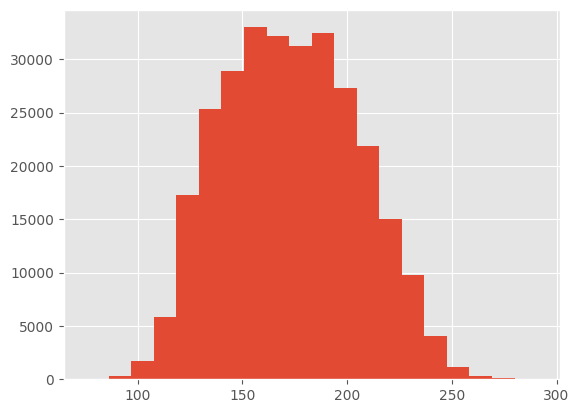

In [ ]:
plt.hist(df.mean_dist, bins=20)
plt.show()

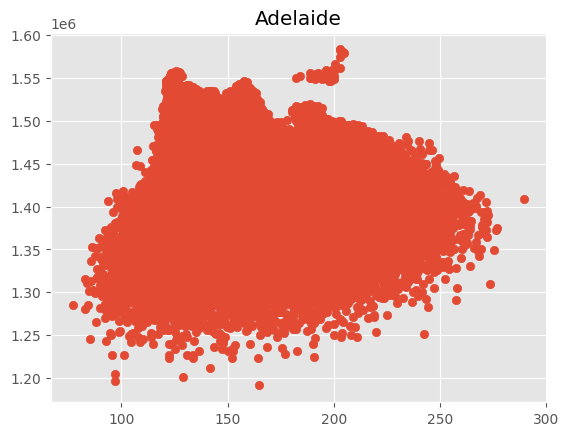

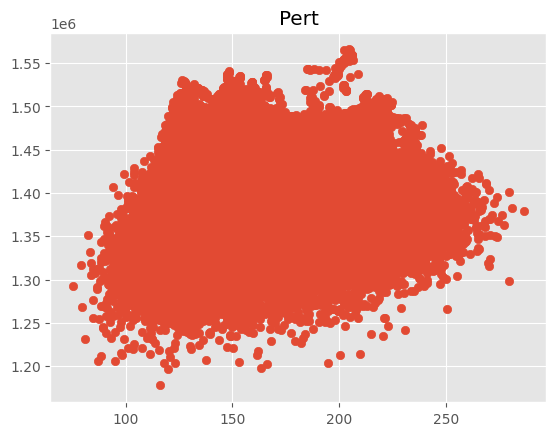

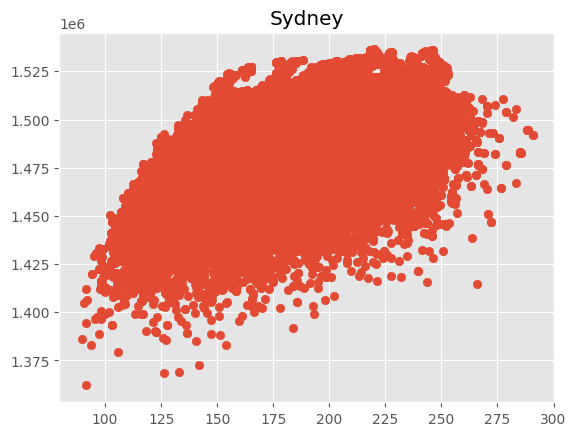

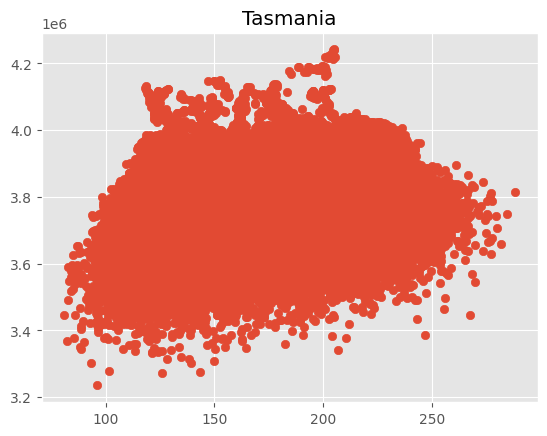

In [ ]:
for region in df.region.unique():
    plt.scatter(df[df.region==region].mean_dist, df[df.region==region].power_output)
    plt.title(f'{region.capitalize()}')
    plt.show()

In [ ]:
class LGBM:
    def __init__(self):
        self.params = { 'objective': 'regression', 'verbose': -1 }
        self.train_data = None
        self.test_data  = None
        self.model = None

    def fit(self, x_train, y_train):
        self.train_data = lgbm.Dataset(x_train, label=y_train)
        self.model = lgbm.train(self.params, self.train_data)

    def predict(self, x_test):
        # self.test_data = lgbm.Dataset(x_test, label=y_test, reference=self.train_data)
        # self.model = lgbm.train(self.params, self.train_data, valid_sets=[self.test_data], num_boost_round=100)
        return self.model.predict(x_test, num_iteration=self.model.best_iteration)



In [ ]:
def get_models():
    return [
        LinearRegression(),
        BayesianRidge(),
        KNeighborsRegressor(n_neighbors=5),
        RandomForestRegressor(),
        XGBRegressor(),
        LGBM()]

for region in df.region.unique():
    print(f'{region}:')
    region_df = df[df.region == region]
    region_mean_output = region_df['power_output'].mean()

    # no mean_dist
    X, Y = region_df.iloc[:,0:32], region_df['power_output']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    print('\tDefault inputs')
    for model in get_models():
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)
        mean_error =  np.sqrt(mse)
        print(f'\t\t{model.__class__.__name__:<22} Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

    # with mean_dist
    X, Y = pd.concat([region_df.iloc[:,0:32], region_df['mean_dist']], ignore_index=True, axis=1), region_df['power_output']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    print('\tExtended inputs with mean dist')
    for model in get_models():
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)
        mean_error =  np.sqrt(mse)
        print(f'\t\t{model.__class__.__name__:<22} Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

adelaide:
	Default inputs
		LinearRegression       Mean error: 51029.5    Mean error % 3.62
		BayesianRidge          Mean error: 51029.3    Mean error % 3.62
		KNeighborsRegressor    Mean error: 25783.9    Mean error % 1.83
		RandomForestRegressor  Mean error: 23701.3    Mean error % 1.68
		XGBRegressor           Mean error: 19933.3    Mean error % 1.41
		LGBM                   Mean error: 21177.9    Mean error % 1.50
	Extended inputs with mean dist
		LinearRegression       Mean error: 50878.2    Mean error % 3.61
		BayesianRidge          Mean error: 50879.3    Mean error % 3.61
		KNeighborsRegressor    Mean error: 25722.7    Mean error % 1.82
		RandomForestRegressor  Mean error: 23799.9    Mean error % 1.69
		XGBRegressor           Mean error: 19956.6    Mean error % 1.42
		LGBM                   Mean error: 21407.0    Mean error % 1.52
pert:
	Default inputs
		LinearRegression       Mean error: 48198.2    Mean error % 3.46
		BayesianRidge          Mean error: 48197.4    Mean error % 3

In [ ]:
for region in df.region.unique():
    print(f'{region}:')
    region_df = df[df.region == region]
    region_mean_output = region_df['power_output'].mean()
    X, Y = region_df.iloc[:,0:32], region_df['power_output']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    for n_estimators in [10, 50, 100, 200, 500, 1000]:
        model = XGBRegressor(n_estimators=n_estimators)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)
        mean_error =  np.sqrt(mse)
        print(f'\tn_estimators: {n_estimators:<10}\t Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

    print()

    for booster in ['gbtree', 'gblinear', 'dart']:
        model = XGBRegressor(booster=booster)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)
        mean_error =  np.sqrt(mse)
        print(f'\tbooster: {booster:<10}\t Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

    print()

    for max_depth in range(10):
        model = XGBRegressor(max_depth=max_depth)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)
        mean_error =  np.sqrt(mse)
        print(f'\tmax_depth: {max_depth:<10} Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

    print()

    for learning_rate in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
        model = XGBRegressor(learning_rate=learning_rate)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)
        mean_error =  np.sqrt(mse)
        print(f'\tlearning_rate: {learning_rate:<10} Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

adelaide:
	n_estimators: 10        	 Mean error: 28227.4    Mean error % 2.00
	n_estimators: 50        	 Mean error: 21518.6    Mean error % 1.53
	n_estimators: 100       	 Mean error: 19933.3    Mean error % 1.41
	n_estimators: 200       	 Mean error: 19312.5    Mean error % 1.37
	n_estimators: 500       	 Mean error: 19157.0    Mean error % 1.36
	n_estimators: 1000      	 Mean error: 19146.1    Mean error % 1.36

	booster: gbtree    	 Mean error: 19933.3    Mean error % 1.41
	booster: gblinear  	 Mean error: 51028.5    Mean error % 3.62
	booster: dart      	 Mean error: 19933.3    Mean error % 1.41

	max_depth: 0          Mean error: 25228.6    Mean error % 1.79
	max_depth: 1          Mean error: 41060.1    Mean error % 2.91
	max_depth: 2          Mean error: 27263.5    Mean error % 1.93
	max_depth: 3          Mean error: 23023.8    Mean error % 1.63
	max_depth: 4          Mean error: 21397.8    Mean error % 1.52
	max_depth: 5          Mean error: 20379.9    Mean error % 1.45
	max_de

In [ ]:
# adelaide best model
region_df = df[df.region == 'adelaide']
region_mean_output = region_df['power_output'].mean()
X, Y = region_df.iloc[:,0:32], region_df['power_output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = XGBRegressor(n_estimators=500, booster='gbtree', max_depth=7, learning_rate=0.3)
model.fit(x_train, y_train)
predict = model.predict(x_test)
mse = mean_squared_error(y_test, predict)
mean_error =  np.sqrt(mse)
print(f'Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

Mean error: 19478.9    Mean error % 1.38


In [ ]:
# pert best model
region_df = df[df.region == 'pert']
region_mean_output = region_df['power_output'].mean()
X, Y = region_df.iloc[:,0:32], region_df['power_output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = XGBRegressor(n_estimators=1000, booster='gbtree', max_depth=7, learning_rate=0.3)
model.fit(x_train, y_train)
predict = model.predict(x_test)
mse = mean_squared_error(y_test, predict)
mean_error =  np.sqrt(mse)
print(f'Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

Mean error: 20039.8    Mean error % 1.44


In [ ]:
# sydney best model
region_df = df[df.region == 'pert']
region_mean_output = region_df['power_output'].mean()
X, Y = region_df.iloc[:,0:32], region_df['power_output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = XGBRegressor(n_estimators=1000, booster='gbtree', max_depth=9, learning_rate=0.3)
model.fit(x_train, y_train)
predict = model.predict(x_test)
mse = mean_squared_error(y_test, predict)
mean_error =  np.sqrt(mse)
print(f'Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

Mean error: 20959.4    Mean error % 1.50


In [ ]:
# tasmania best model
region_df = df[df.region == 'tasmania']
region_mean_output = region_df['power_output'].mean()
X, Y = region_df.iloc[:,0:32], region_df['power_output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = XGBRegressor(n_estimators=500, booster='gbtree', max_depth=7, learning_rate=0.3)
model.fit(x_train, y_train)
predict = model.predict(x_test)
mse = mean_squared_error(y_test, predict)
mean_error =  np.sqrt(mse)
print(f'Mean error: {mean_error:<10.1f} Mean error % {(mean_error / region_mean_output) * 100:.2f}')

Mean error: 51611.5    Mean error % 1.37
